In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, TargetEncoder


# To avoid truncating the output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Load data

In [2]:
train = pd.read_csv("vct_data/train_raw.csv")
train.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration,Rating_TeamA,Average Combat Score_TeamA,Kills_TeamA,Deaths_TeamA,Assists_TeamA,Kills - Deaths (KD)_TeamA,"Kill, Assist, Trade, Survive %_TeamA",Average Damage Per Round_TeamA,Headshot %_TeamA,First Kills_TeamA,First Deaths_TeamA,Kills - Deaths (FKD)_TeamA,Rating_TeamB,Average Combat Score_TeamB,Kills_TeamB,Deaths_TeamB,Assists_TeamB,Kills - Deaths (KD)_TeamB,"Kill, Assist, Trade, Survive %_TeamB",Average Damage Per Round_TeamB,Headshot %_TeamB,First Kills_TeamB,First Deaths_TeamB,Kills - Deaths (FKD)_TeamB,Loadout Value_TeamA,Remaining Credits_TeamA,Type_TeamA,Loadout Value_TeamB,Remaining Credits_TeamB,Type_TeamB,2k_TeamA,3k_TeamA,4k_TeamA,5k_TeamA,1v1_TeamA,1v2_TeamA,1v3_TeamA,1v4_TeamA,1v5_TeamA,Econ_TeamA,Spike Plants_TeamA,Spike Defuses_TeamA,2k_TeamB,3k_TeamB,4k_TeamB,5k_TeamB,1v1_TeamB,1v2_TeamB,1v3_TeamB,1v4_TeamB,1v5_TeamB,Econ_TeamB,Spike Plants_TeamB,Spike Defuses_TeamB,Elimination_TeamA,Detonated_TeamA,Defused_TeamA,Time Expiry (No Plant)_TeamA,Eliminated_TeamA,Defused Failed_TeamA,Detonation Denied_TeamA,Time Expiry (Failed to Plant)_TeamA,Elimination_TeamB,Detonated_TeamB,Defused_TeamB,Time Expiry (No Plant)_TeamB,Eliminated_TeamB,Defused Failed_TeamB,Detonation Denied_TeamB,Time Expiry (Failed to Plant)_TeamB,Winner
0,Champions Tour LATAM Stage 1: Challengers 1,Open Qualifier: LAS,Round of 16,Leviatán vs Furious Gaming,Ascent,Leviatán,7,6,1.0,NaN,Furious Gaming,13,7,6.0,NaN,41:53,NaN,186.0,60.0,76.0,22.0,-16.0,NaN,119.6,0.250,10.0,10.0,0.0,NaN,218.4,76.0,60.0,25.0,16.0,NaN,132.8,0.190,10.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,3.0,1.0,9.0,0.0,3.0,1.0,9.0,0.0,3.0,1.0,2.0,1.0,3.0,1.0,0
1,Champions Tour LATAM Stage 1: Challengers 1,Open Qualifier: LAS,Round of 16,Leviatán vs Furious Gaming,Ascent,Furious Gaming,13,7,6.0,NaN,Leviatán,7,6,1.0,NaN,41:53,NaN,218.4,76.0,60.0,25.0,16.0,NaN,132.8,0.190,10.0,10.0,0.0,NaN,186.0,60.0,76.0,22.0,-16.0,NaN,119.6,0.250,10.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0.0,3.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,9.0,0.0,3.0,1.0,1
2,Champions Tour LATAM Stage 1: Challengers 1,Open Qualifier: LAS,Round of 16,Leviatán vs Furious Gaming,Bind,Leviatán,7,5,2.0,NaN,Furious Gaming,13,6,7.0,NaN,38:56,NaN,175.8,56.0,81.0,27.0,-25.0,NaN,113.6,0.160,10.0,10.0,0.0,NaN,228.8,81.0,56.0,35.0,25.0,NaN,164.6,0.202,10.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,0.0,0.0,8.0,0.0,5.0,0.0,8.0,0.0,5.0,0.0,4.0,3.0,0.0,0.0,0
3,Champions Tour LATAM Stage 1: Challengers 1,Open Qualifier: LAS,Round of 16,Leviatán vs Furious Gaming,Bind,Furious Gaming,13,6,7.0,NaN,Leviatán,7,5,2.0,NaN,38:56,NaN,228.8,81.0,56.0,35.0,25.0,NaN,164.6,0.202,10.0,10.0,0.0,NaN,175.8,56.0,81.0,27.0,-25.0,NaN,113.6,0.160,10.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,0.0,5.0,0.0,4.0,3.0,0.0,0.0,4.0,3.0,0.0,0.0,8.0,0.0,5.0,0.0,1
4,Champions Tour LATAM Stage 1: Challengers 1,Open Qualifier: LAS,Round of 16,Procyon Team vs KRÜ Esports,Bind,Procyon Team,1,1,0.0,NaN,KRÜ Esports,13,2,11.0,NaN,28:02,NaN,187.2,40.0,67.0,21.0,-27.0,NaN,130.8,0.192,6.0,8.0,-2.0,NaN,253.0,67.0,40.0,23.0,27.0,NaN,150.0,0.314,8.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,9.0,3.0,1.0,0.0,9.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0


In [3]:
test = pd.read_csv("vct_data/test_raw.csv")
test.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration,Rating_TeamA,Average Combat Score_TeamA,Kills_TeamA,Deaths_TeamA,Assists_TeamA,Kills - Deaths (KD)_TeamA,"Kill, Assist, Trade, Survive %_TeamA",Average Damage Per Round_TeamA,Headshot %_TeamA,First Kills_TeamA,First Deaths_TeamA,Kills - Deaths (FKD)_TeamA,Rating_TeamB,Average Combat Score_TeamB,Kills_TeamB,Deaths_TeamB,Assists_TeamB,Kills - Deaths (KD)_TeamB,"Kill, Assist, Trade, Survive %_TeamB",Average Damage Per Round_TeamB,Headshot %_TeamB,First Kills_TeamB,First Deaths_TeamB,Kills - Deaths (FKD)_TeamB,Loadout Value_TeamA,Remaining Credits_TeamA,Type_TeamA,Loadout Value_TeamB,Remaining Credits_TeamB,Type_TeamB,2k_TeamA,3k_TeamA,4k_TeamA,5k_TeamA,1v1_TeamA,1v2_TeamA,1v3_TeamA,1v4_TeamA,1v5_TeamA,Econ_TeamA,Spike Plants_TeamA,Spike Defuses_TeamA,2k_TeamB,3k_TeamB,4k_TeamB,5k_TeamB,1v1_TeamB,1v2_TeamB,1v3_TeamB,1v4_TeamB,1v5_TeamB,Econ_TeamB,Spike Plants_TeamB,Spike Defuses_TeamB,Elimination_TeamA,Detonated_TeamA,Defused_TeamA,Time Expiry (No Plant)_TeamA,Eliminated_TeamA,Defused Failed_TeamA,Detonation Denied_TeamA,Time Expiry (Failed to Plant)_TeamA,Elimination_TeamB,Detonated_TeamB,Defused_TeamB,Time Expiry (No Plant)_TeamB,Eliminated_TeamB,Defused Failed_TeamB,Detonation Denied_TeamB,Time Expiry (Failed to Plant)_TeamB,Winner
0,Champions Tour 2024: Pacific Kickoff,Group Stage,Opening (A),T1 vs BLEED,Breeze,T1,18,6,6,6.0,BLEED,16,6,6,4.0,3:22:31,1.104,214.6,126.0,116.0,36.0,10.0,0.724,145.2,0.292,15.0,19.0,-4.0,0.850,192.6,116.0,126.0,40.0,-10.0,0.730,125.6,0.266,19.0,15.0,4.0,19458.823529,4994.117647,Full buy: 20k+,20517.647059,5367.647059,Full buy: 20k+,28.0,4.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,45.8,14.0,6.0,22.0,5.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,37.4,13.0,6.0,11,1,6,0,7,3,6,0,7,3,6,0,11,1,6,0,1
1,Champions Tour 2024: Pacific Kickoff,Group Stage,Opening (A),T1 vs BLEED,Breeze,BLEED,16,6,6,4.0,T1,18,6,6,6.0,3:22:31,0.850,192.6,116.0,126.0,40.0,-10.0,0.730,125.6,0.266,19.0,15.0,4.0,1.104,214.6,126.0,116.0,36.0,10.0,0.724,145.2,0.292,15.0,19.0,-4.0,20517.647059,5367.647059,Full buy: 20k+,19458.823529,4994.117647,Full buy: 20k+,22.0,5.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,37.4,13.0,6.0,28.0,4.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,45.8,14.0,6.0,7,3,6,0,11,1,6,0,11,1,6,0,7,3,6,0,0
2,Champions Tour 2024: Pacific Kickoff,Group Stage,Opening (A),T1 vs BLEED,Lotus,T1,13,9,4,NaN,BLEED,6,3,3,NaN,47:45,1.160,221.2,75.0,59.0,36.0,16.0,0.758,143.4,0.248,11.0,8.0,3.0,0.860,191.8,59.0,75.0,24.0,-16.0,0.642,128.8,0.244,8.0,11.0,-3.0,19810.526316,9421.052632,Full buy: 20k+,16073.684211,4147.368421,Full buy: 20k+,15.0,4.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,57.6,10.0,4.0,12.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,51.2,7.0,2.0,6,3,4,0,3,1,2,0,3,1,2,0,6,3,4,0,1
3,Champions Tour 2024: Pacific Kickoff,Group Stage,Opening (A),T1 vs BLEED,Lotus,BLEED,6,3,3,NaN,T1,13,9,4,NaN,47:45,0.860,191.8,59.0,75.0,24.0,-16.0,0.642,128.8,0.244,8.0,11.0,-3.0,1.160,221.2,75.0,59.0,36.0,16.0,0.758,143.4,0.248,11.0,8.0,3.0,16073.684211,4147.368421,Full buy: 20k+,19810.526316,9421.052632,Full buy: 20k+,12.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,51.2,7.0,2.0,15.0,4.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,57.6,10.0,4.0,3,1,2,0,6,3,4,0,6,3,4,0,3,1,2,0,0
4,Champions Tour 2024: Pacific Kickoff,Group Stage,Opening (C),Gen.G vs Rex Regum Qeon,Icebox,Gen.G,13,6,7,NaN,Rex Regum Qeon,11,5,6,NaN,50:50,1.036,205.0,87.0,82.0,28.0,5.0,0.742,136.2,0.290,15.0,9.0,6.0,0.944,193.4,82.0,87.0,26.0,-5.0,0.692,124.4,0.320,9.0,15.0,-6.0,17695.833333,10762.500000,Full buy: 20k+,18137.500000,9095.833333,Full buy: 20k+,12.0,5.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,56.6,8.0,6.0,18.0,6.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,48.0,11.0,2.0,6,1,6,0,9,0,2,0,9,0,2,0,6,1,6,0,1


# Handling missing values

Identifying columns with missing values

In [4]:
missing_values = train.isnull().sum()
missing_values[missing_values > 0]

Map                                        80
Team A Defender Score                       1
Team A Overtime Score                   44194
Team B Defender Score                       1
Team B Overtime Score                   44194
Duration                                  394
Rating_TeamA                            11365
Average Combat Score_TeamA                345
Kills_TeamA                               268
Deaths_TeamA                              268
Assists_TeamA                             268
Kills - Deaths (KD)_TeamA                 268
Kill, Assist, Trade, Survive %_TeamA    11347
Average Damage Per Round_TeamA            503
Headshot %_TeamA                          509
First Kills_TeamA                         268
First Deaths_TeamA                        268
Kills - Deaths (FKD)_TeamA                268
Rating_TeamB                            11365
Average Combat Score_TeamB                345
Kills_TeamB                               268
Deaths_TeamB                      

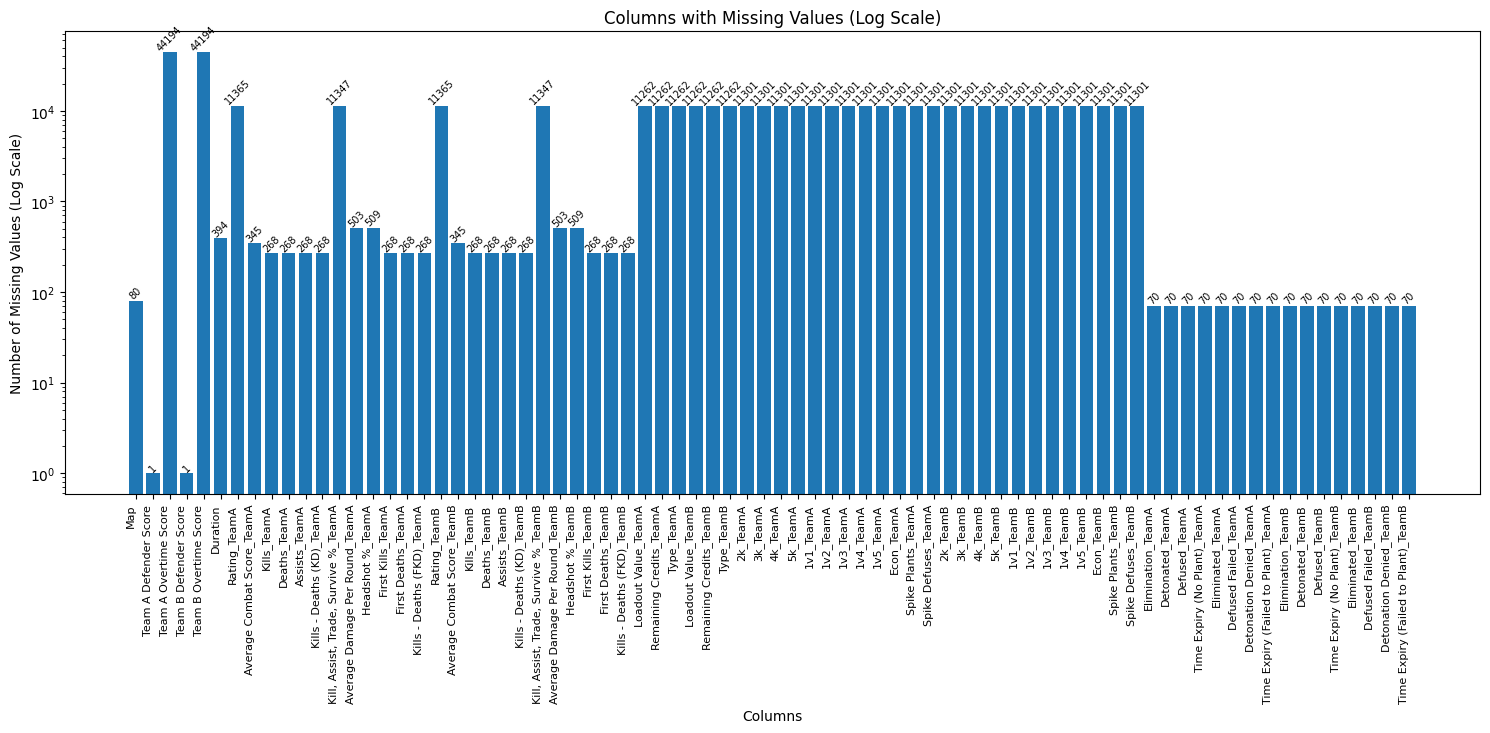

In [5]:
# Filter to show only columns with missing values
missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(15, 10))

# Use log scale for y-axis
plt.bar(range(len(missing_values)), missing_values.values)
plt.yscale('log')

plt.title('Columns with Missing Values (Log Scale)')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values (Log Scale)')

plt.xticks(range(len(missing_values)), missing_values.index, rotation=90, ha='right', fontsize=8)

# Add value labels on top of each bar
for i, v in enumerate(missing_values.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=7, rotation=45)

# Adjust layout and margins
plt.tight_layout()
plt.subplots_adjust(bottom=0.5)

plt.show()

Handling missing data by imputing strategies and by dropping rows with high percentage of missing values

In [6]:
# Drop rows with these missing values since the majority of their other columns are also missing
train = train.dropna(subset=["Map", "Team A Defender Score", "Team B Defender Score"])
test = test.dropna(subset=["Map", "Team B Defender Score"])


# Fill with zeros since NaN values are due to no occurrences
cols_fill_zero = ["Team A Overtime Score", "Team B Overtime Score", "2k_TeamA", "3k_TeamA", "4k_TeamA", 
                  "5k_TeamA", "1v1_TeamA", "1v2_TeamA", "1v3_TeamA", "1v4_TeamA", "1v5_TeamA", "2k_TeamB", 
                  "3k_TeamB", "4k_TeamB", "5k_TeamB", "1v1_TeamB", "1v2_TeamB", "1v3_TeamB","1v4_TeamB", 
                  "1v5_TeamB", "Spike Plants_TeamA", "Spike Defuses_TeamA", "Spike Plants_TeamB",
                  "Spike Defuses_TeamB", "Elimination_TeamA", "Detonated_TeamA", "Defused_TeamA", 
                  "Time Expiry (No Plant)_TeamA", "Eliminated_TeamA","Defused Failed_TeamA",
                  "Detonation Denied_TeamA","Time Expiry (Failed to Plant)_TeamA", "Elimination_TeamB",
                  "Detonated_TeamB", "Defused_TeamB", "Time Expiry (No Plant)_TeamB","Eliminated_TeamB", 
                  "Defused Failed_TeamB", "Detonation Denied_TeamB","Time Expiry (Failed to Plant)_TeamB"]

train[cols_fill_zero] = train[cols_fill_zero].fillna(0)
test[cols_fill_zero] = test[cols_fill_zero].fillna(0)


# Fill with the most frequent value
cols_fill_mode = ["Duration", "Type_TeamA", "Type_TeamB"]

categorical_imp = SimpleImputer(strategy="most_frequent")

train[cols_fill_mode] = categorical_imp.fit_transform(train[cols_fill_mode])
test[cols_fill_mode] = categorical_imp.transform(test[cols_fill_mode])


# Fill with the mean
cols_fill_float_mean = ["Rating_TeamA", "Average Combat Score_TeamA", "Kill, Assist, Trade, Survive %_TeamA",
                        "Average Damage Per Round_TeamA", "Headshot %_TeamA", "Rating_TeamB", "Average Combat Score_TeamB", 
                        "Kill, Assist, Trade, Survive %_TeamB","Average Damage Per Round_TeamB", "Headshot %_TeamB",
                        "Loadout Value_TeamA", "Remaining Credits_TeamA", "Loadout Value_TeamB", "Remaining Credits_TeamB", 
                        "Econ_TeamA", "Econ_TeamB"]

cols_fill_int_mean = ["Kills_TeamA", "Deaths_TeamA", "Assists_TeamA", "Kills - Deaths (KD)_TeamA", "First Kills_TeamA", 
                      "First Deaths_TeamA", "Kills - Deaths (FKD)_TeamA", "Kills_TeamB","Deaths_TeamB", "Assists_TeamB",
                      "Kills - Deaths (KD)_TeamB", "First Kills_TeamB", "First Deaths_TeamB", "Kills - Deaths (FKD)_TeamB"]

mean_imp = SimpleImputer(strategy="mean")

train[cols_fill_float_mean] = mean_imp.fit_transform(train[cols_fill_float_mean])
test[cols_fill_float_mean] = mean_imp.transform(test[cols_fill_float_mean])

train[cols_fill_int_mean] = mean_imp.fit_transform(train[cols_fill_int_mean])
train[cols_fill_int_mean] = train[cols_fill_int_mean].astype("int")

test[cols_fill_int_mean] = mean_imp.transform(test[cols_fill_int_mean])
test[cols_fill_int_mean] = test[cols_fill_int_mean].astype("int")

In [7]:
missing_values = train.isnull().sum()

if missing_values.sum() == 0:
    print("No missing values")
else:
    print(missing_values[missing_values > 0])

No missing values


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48414 entries, 0 to 48495
Data columns (total 87 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Tournament                            48414 non-null  object 
 1   Stage                                 48414 non-null  object 
 2   Match Type                            48414 non-null  object 
 3   Match Name                            48414 non-null  object 
 4   Map                                   48414 non-null  object 
 5   Team A                                48414 non-null  object 
 6   Team A Score                          48414 non-null  int64  
 7   Team A Attacker Score                 48414 non-null  int64  
 8   Team A Defender Score                 48414 non-null  float64
 9   Team A Overtime Score                 48414 non-null  float64
 10  Team B                                48414 non-null  object 
 11  Team B Score        

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 87 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Tournament                            2208 non-null   object 
 1   Stage                                 2208 non-null   object 
 2   Match Type                            2208 non-null   object 
 3   Match Name                            2208 non-null   object 
 4   Map                                   2208 non-null   object 
 5   Team A                                2208 non-null   object 
 6   Team A Score                          2208 non-null   int64  
 7   Team A Attacker Score                 2208 non-null   int64  
 8   Team A Defender Score                 2208 non-null   int64  
 9   Team A Overtime Score                 2208 non-null   float64
 10  Team B                                2208 non-null   object 
 11  Team B Score     

# Converting columns to their appropriate data type

Convert specified columns to integers

In [10]:
convert_columns = ['Team A Overtime Score','Team B Overtime Score', 'Team A Defender Score','Team B Defender Score']
train[convert_columns] = train[convert_columns].astype('int')
test[convert_columns] = test[convert_columns].astype('int')

Convert Duration column to minutes in float type

In [11]:
train['Duration'] = pd.to_timedelta(train['Duration'].apply(lambda x: '00:' + x if len(x.split(':')) == 2 else x)).dt.total_seconds() / 60
train['Duration'].head()

0    41.883333
1    41.883333
2    38.933333
3    38.933333
4    28.033333
Name: Duration, dtype: float64

In [12]:
test['Duration'] = pd.to_timedelta(test['Duration'].apply(lambda x: '00:' + x if len(x.split(':')) == 2 else x)).dt.total_seconds() / 60
test['Duration'].head()

0    202.516667
1    202.516667
2     47.750000
3     47.750000
4     50.833333
Name: Duration, dtype: float64

Checking if changes were correctly applied

In [13]:
train.dtypes

Tournament                               object
Stage                                    object
Match Type                               object
Match Name                               object
Map                                      object
Team A                                   object
Team A Score                              int64
Team A Attacker Score                     int64
Team A Defender Score                     int32
Team A Overtime Score                     int32
Team B                                   object
Team B Score                              int64
Team B Attacker Score                     int64
Team B Defender Score                     int32
Team B Overtime Score                     int32
Duration                                float64
Rating_TeamA                            float64
Average Combat Score_TeamA              float64
Kills_TeamA                               int32
Deaths_TeamA                              int32
Assists_TeamA                           

# Feature engineering

Concatenate train and test sets to ensure rolling features and aggregated stats are computed with full historical data continuity. This prevents the test set from starting with a blank slate and allows it to benefit from the training set's prior match history. Re-split after feature creation.

In [14]:
# Track which rows are from the train and test sets
train["from_train"] = True
test["from_train"] = False

# Combine train and test sets to ensure continuity of stats
combined = pd.concat([train, test]).reset_index(drop=True)

# Compute specified stats from the last 5 games
def create_rolling_features(df, window=5):
    for team in ["TeamA", "TeamB"]:

        # Compute KDA per team
        df[f"KDA_{team}"] = (df[f"Kills_{team}"] + df[f"Assists_{team}"]) / np.maximum(df[f"Deaths_{team}"], 1)

        # Total clutches in a game
        df[f"Clutches_{team}"] = df[[f"1v{x}_{team}" for x in range(1, 6)]].sum(axis=1)

        # First blood %
        total_rounds = df["Team A Score"] + df["Team B Score"]
        df[f"First Blood %_{team}"] = df[f"First Kills_{team}"] / total_rounds

        # Attacker, Defender, and Overtime win rates
        opponent = "Team B" if team == "TeamA" else "Team A"
        df[f"Attacker Win %_{team}"] = df[f"Team {team[-1]} Attacker Score"] / np.maximum(df[f"Team {team[-1]} Attacker Score"] + df[f"{opponent} Defender Score"], 1)
        df[f"Defender Win %_{team}"] = df[f"Team {team[-1]} Defender Score"] / np.maximum(df[f"Team {team[-1]} Defender Score"] + df[f"{opponent} Attacker Score"], 1)
        df[f"Overtime Win %_{team}"] = df[f"Team {team[-1]} Overtime Score"] / np.maximum(df[f"Team {team[-1]} Overtime Score"] + df[f"{opponent} Overtime Score"], 1)
        
        # List of columns to apply rolling average on
        cols = ["Rating", "Average Combat Score", "Average Damage Per Round", "KDA", "Kill, Assist, Trade, Survive %",
                "Attacker Win %", "Defender Win %", "Overtime Win %", "First Blood %", "Headshot %", "Clutches", "Econ"]

        # Group by team to avoid mixing data between teams
        for col in cols:
            df[f"{col}_RollAvg_{team}"] = df.groupby(f"Team {team[-1]}")[f"{col}_{team}"] \
                                            .transform(lambda x: x.shift(1)
                                                                  .rolling(window=window, min_periods=1)
                                                                  .mean()
                                                                  .fillna(0))

            # Identify if this is the first appearance of the team, and overwrite the result with 0s if so
            first_match = df.groupby(f"Team {team[-1]}").cumcount() == 0
            df.loc[first_match, f"{col}_RollAvg_{team}"] = 0
        
        # Recent win rate
        df[f"Recent Win %_{team}"] = df.groupby(f"Team {team[-1]}")["Winner"] \
                                       .transform(lambda x: x.shift(1)
                                                             .rolling(window=window, min_periods=1)
                                                             .mean()
                                                             .fillna(0))
    return df


# Computes historical win rate excluding the current match (row)
def past_win_rate(group):
    cumsum = group.cumsum()
    total = np.arange(1, len(group) + 1)
    return (cumsum - group) / (total - 1)


# Create Map and H2H win rates for each team
def create_win_rate_features(df, initial_rate=0):
    for team in ["Team A", "Team B"]:
        # Map Win %
        df[f"{team} Map Win %"] = df.groupby([team, "Map"])["Winner"].transform(lambda x: past_win_rate(x == team))
        
        # H2H Win %
        df[f"{team} H2H Win %"] = df.groupby(["Team A", "Team B"])["Winner"].transform(lambda x: past_win_rate(x == team))
    
    # Replace NaN (for first games) with initial rate
    for team in ["Team A", "Team B"]:
        df[f"{team} Map Win %"] = df[f"{team} Map Win %"].fillna(initial_rate)
        df[f"{team} H2H Win %"] = df[f"{team} H2H Win %"].fillna(initial_rate)

    return df


# Apply feature engineering functions
combined = create_rolling_features(combined)
combined = create_win_rate_features(combined)

# Split back into train and test sets
train = combined[combined["from_train"]]
test = combined[~combined["from_train"]]

# Drop the temporary column
train = train.drop(columns=["from_train"])
test = test.drop(columns=["from_train"])

In [15]:
train.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration,Rating_TeamA,Average Combat Score_TeamA,Kills_TeamA,Deaths_TeamA,Assists_TeamA,Kills - Deaths (KD)_TeamA,"Kill, Assist, Trade, Survive %_TeamA",Average Damage Per Round_TeamA,Headshot %_TeamA,First Kills_TeamA,First Deaths_TeamA,Kills - Deaths (FKD)_TeamA,Rating_TeamB,Average Combat Score_TeamB,Kills_TeamB,Deaths_TeamB,Assists_TeamB,Kills - Deaths (KD)_TeamB,"Kill, Assist, Trade, Survive %_TeamB",Average Damage Per Round_TeamB,Headshot %_TeamB,First Kills_TeamB,First Deaths_TeamB,Kills - Deaths (FKD)_TeamB,Loadout Value_TeamA,Remaining Credits_TeamA,Type_TeamA,Loadout Value_TeamB,Remaining Credits_TeamB,Type_TeamB,2k_TeamA,3k_TeamA,4k_TeamA,5k_TeamA,1v1_TeamA,1v2_TeamA,1v3_TeamA,1v4_TeamA,1v5_TeamA,Econ_TeamA,Spike Plants_TeamA,Spike Defuses_TeamA,2k_TeamB,3k_TeamB,4k_TeamB,5k_TeamB,1v1_TeamB,1v2_TeamB,1v3_TeamB,1v4_TeamB,1v5_TeamB,Econ_TeamB,Spike Plants_TeamB,Spike Defuses_TeamB,Elimination_TeamA,Detonated_TeamA,Defused_TeamA,Time Expiry (No Plant)_TeamA,Eliminated_TeamA,Defused Failed_TeamA,Detonation Denied_TeamA,Time Expiry (Failed to Plant)_TeamA,Elimination_TeamB,Detonated_TeamB,Defused_TeamB,Time Expiry (No Plant)_TeamB,Eliminated_TeamB,Defused Failed_TeamB,Detonation Denied_TeamB,Time Expiry (Failed to Plant)_TeamB,Winner,KDA_TeamA,Clutches_TeamA,First Blood %_TeamA,Attacker Win %_TeamA,Defender Win %_TeamA,Overtime Win %_TeamA,Rating_RollAvg_TeamA,Average Combat Score_RollAvg_TeamA,Average Damage Per Round_RollAvg_TeamA,KDA_RollAvg_TeamA,"Kill, Assist, Trade, Survive %_RollAvg_TeamA",Attacker Win %_RollAvg_TeamA,Defender Win %_RollAvg_TeamA,Overtime Win %_RollAvg_TeamA,First Blood %_RollAvg_TeamA,Headshot %_RollAvg_TeamA,Clutches_RollAvg_TeamA,Econ_RollAvg_TeamA,Recent Win %_TeamA,KDA_TeamB,Clutches_TeamB,First Blood %_TeamB,Attacker Win %_TeamB,Defender Win %_TeamB,Overtime Win %_TeamB,Rating_RollAvg_TeamB,Average Combat Score_RollAvg_TeamB,Average Damage Per Round_RollAvg_TeamB,KDA_RollAvg_TeamB,"Kill, Assist, Trade, Survive %_RollAvg_TeamB",Attacker Win %_RollAvg_TeamB,Defender Win %_RollAvg_TeamB,Overtime Win %_RollAvg_TeamB,First Blood %_RollAvg_TeamB,Headshot %_RollAvg_TeamB,Clutches_RollAvg_TeamB,Econ_RollAvg_TeamB,Recent Win %_TeamB,Team A Map Win %,Team A H2H Win %,Team B Map Win %,Team B H2H Win %
0,Champions Tour LATAM Stage 1: Challengers 1,Open Qualifier: LAS,Round of 16,Leviatán vs Furious Gaming,Ascent,Leviatán,7,6,1,0,Furious Gaming,13,7,6,0,41.883333,0.992282,186.0,60,76,22,-16,0.701367,119.6,0.250,10,10,0,0.992282,218.4,76,60,25,16,0.701367,132.8,0.190,10,10,0,17518.95592,8480.648076,Full buy: 20k+,17518.95592,8480.648076,Full buy: 20k+,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.592817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.592817,0.0,0.0,2.0,1.0,3.0,1.0,9.0,0.0,3.0,1.0,9.0,0.0,3.0,1.0,2.0,1.0,3.0,1.0,0,1.078947,0.0,0.500000,0.500000,0.125000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000,0.000,0.0,0.0,0.00,0.0,0.000000,0.0,1.683333,0.0,0.500000,0.875000,0.500000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000,0.000,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,Champions Tour LATAM Stage 1: Challengers 1,Open Qualifier: LAS,Round of 16,Leviatán vs Furious Gaming,Ascent,Furious Gaming,13,7,6,0,Leviatán,7,6,1,0,41.883333,0.992282,218.4,76,60,25,16,0.701367,132.8,0.190,10,10,0,0.992282,186.0,60,76,22,-16,0.701367,119.6,0.250,10,10,0,17518.95592,8480.648076,Full buy: 20k+,17518.95592,8480.648076,Full buy: 20k+,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.592817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.592817,0.0,0.0,9.0,0.0,3.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,9.0,0.0,3.0,1.0,1,1.683333,0.0,0.500000,0.875000,0.500000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000,0.000,0.0,0.0,0.00,0.0,0.000000,0.0,1.078947,0.0,0.500000,0.500000,0.125000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00

In [16]:
test.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration,Rating_TeamA,Average Combat Score_TeamA,Kills_TeamA,Deaths_TeamA,Assists_TeamA,Kills - Deaths (KD)_TeamA,"Kill, Assist, Trade, Survive %_TeamA",Average Damage Per Round_TeamA,Headshot %_TeamA,First Kills_TeamA,First Deaths_TeamA,Kills - Deaths (FKD)_TeamA,Rating_TeamB,Average Combat Score_TeamB,Kills_TeamB,Deaths_TeamB,Assists_TeamB,Kills - Deaths (KD)_TeamB,"Kill, Assist, Trade, Survive %_TeamB",Average Damage Per Round_TeamB,Headshot %_TeamB,First Kills_TeamB,First Deaths_TeamB,Kills - Deaths (FKD)_TeamB,Loadout Value_TeamA,Remaining Credits_TeamA,Type_TeamA,Loadout Value_TeamB,Remaining Credits_TeamB,Type_TeamB,2k_TeamA,3k_TeamA,4k_TeamA,5k_TeamA,1v1_TeamA,1v2_TeamA,1v3_TeamA,1v4_TeamA,1v5_TeamA,Econ_TeamA,Spike Plants_TeamA,Spike Defuses_TeamA,2k_TeamB,3k_TeamB,4k_TeamB,5k_TeamB,1v1_TeamB,1v2_TeamB,1v3_TeamB,1v4_TeamB,1v5_TeamB,Econ_TeamB,Spike Plants_TeamB,Spike Defuses_TeamB,Elimination_TeamA,Detonated_TeamA,Defused_TeamA,Time Expiry (No Plant)_TeamA,Eliminated_TeamA,Defused Failed_TeamA,Detonation Denied_TeamA,Time Expiry (Failed to Plant)_TeamA,Elimination_TeamB,Detonated_TeamB,Defused_TeamB,Time Expiry (No Plant)_TeamB,Eliminated_TeamB,Defused Failed_TeamB,Detonation Denied_TeamB,Time Expiry (Failed to Plant)_TeamB,Winner,KDA_TeamA,Clutches_TeamA,First Blood %_TeamA,Attacker Win %_TeamA,Defender Win %_TeamA,Overtime Win %_TeamA,Rating_RollAvg_TeamA,Average Combat Score_RollAvg_TeamA,Average Damage Per Round_RollAvg_TeamA,KDA_RollAvg_TeamA,"Kill, Assist, Trade, Survive %_RollAvg_TeamA",Attacker Win %_RollAvg_TeamA,Defender Win %_RollAvg_TeamA,Overtime Win %_RollAvg_TeamA,First Blood %_RollAvg_TeamA,Headshot %_RollAvg_TeamA,Clutches_RollAvg_TeamA,Econ_RollAvg_TeamA,Recent Win %_TeamA,KDA_TeamB,Clutches_TeamB,First Blood %_TeamB,Attacker Win %_TeamB,Defender Win %_TeamB,Overtime Win %_TeamB,Rating_RollAvg_TeamB,Average Combat Score_RollAvg_TeamB,Average Damage Per Round_RollAvg_TeamB,KDA_RollAvg_TeamB,"Kill, Assist, Trade, Survive %_RollAvg_TeamB",Attacker Win %_RollAvg_TeamB,Defender Win %_RollAvg_TeamB,Overtime Win %_RollAvg_TeamB,First Blood %_RollAvg_TeamB,Headshot %_RollAvg_TeamB,Clutches_RollAvg_TeamB,Econ_RollAvg_TeamB,Recent Win %_TeamB,Team A Map Win %,Team A H2H Win %,Team B Map Win %,Team B H2H Win %
48414,Champions Tour 2024: Pacific Kickoff,Group Stage,Opening (A),T1 vs BLEED,Breeze,T1,18,6,6,6,BLEED,16,6,6,4,202.516667,1.104,214.6,126,116,36,10,0.724,145.2,0.292,15,19,-4,0.850,192.6,116,126,40,-10,0.730,125.6,0.266,19,15,4,19458.823529,4994.117647,Full buy: 20k+,20517.647059,5367.647059,Full buy: 20k+,28.0,4.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,45.8,14.0,6.0,22.0,5.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,37.4,13.0,6.0,11.0,1.0,6.0,0.0,7.0,3.0,6.0,0.0,7.0,3.0,6.0,0.0,11.0,1.0,6.0,0.0,1,1.396552,2.0,0.441176,0.500000,0.500000,0.6,0.9476,189.04,123.16,1.261334,0.6620,0.557576,0.433333,0.00,0.454615,0.2740,2.2,47.00,0.4,1.238095,5.0,0.558824,0.500000,0.500000,0.4,1.0024,203.16,133.12,1.431985,0.7352,0.533333,0.415152,0.0000,0.487308,0.2480,2.0,53.20,0.6,0.0,0.0,0.0,0.0
48415,Champions Tour 2024: Pacific Kickoff,Group Stage,Opening (A),T1 vs BLEED,Breeze,BLEED,16,6,6,4,T1,18,6,6,6,202.516667,0.850,192.6,116,126,40,-10,0.730,125.6,0.266,19,15,4,1.104,214.6,126,116,36,10,0.724,145.2,0.292,15,19,-4,20517.647059,5367.647059,Full buy: 20k+,19458.823529,4994.117647,Full buy: 20k+,22.0,5.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,37.4,13.0,6.0,28.0,4.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,45.8,14.0,6.0,7.0,3.0,6.0,0.0,11.0,1.0,6.0,0.0,11.0,1.0,6.0,0.0,7.0,3.0,6.0,0.0,0,1.238095,5.0,0.558824,0.500000,0.500000,0.4,1.0024,203.16,133.12,1.431985,0.7352,0.533333,0.415152,0.00,0.487308,0.2480,2.0,53.20,0.4,1.396552,2.0,0.441176,0.500000,0.500000,0.6,0.9476,189.04,123.16,1.261334,0.6620,0.557576,0.433333,0.0000,0.454615,0.2740,2.2,47.00,0.6,0.

# Extract features and target

In [17]:
y_train = train["Winner"]
X_train = train.drop("Winner", axis=1)

y_test = test["Winner"]
X_test = test.drop("Winner", axis=1)

# Encoding categorical variables

In [18]:
# Identify categorical columns and their cardinality
categorical_columns = train.select_dtypes(include=["object"]).columns

for col in categorical_columns:
    print(f"{col}: {train[col].nunique()}")

Tournament: 195
Stage: 84
Match Type: 252
Match Name: 10179
Map: 9
Team A: 3959
Team B: 3959
Type_TeamA: 4
Type_TeamB: 4


One-hot encoding for Map column

In [19]:
maps = [["Abyss", "Ascent", "Bind", "Breeze", "Fracture", "Haven", "Icebox", "Lotus", "Pearl", "Split", "Sunset"]]

OH_encoder = OneHotEncoder(categories=maps, handle_unknown="ignore", sparse_output=False)

map_train = OH_encoder.fit_transform(X_train[["Map"]])
map_test = OH_encoder.transform(X_test[["Map"]])

map_names = OH_encoder.get_feature_names_out(["Map"])

map_train_df = pd.DataFrame(map_train, columns=map_names, index=X_train.index)
map_test_df = pd.DataFrame(map_test, columns=map_names, index=X_test.index)

X_train = pd.concat([X_train, map_train_df], axis=1)
X_test = pd.concat([X_test, map_test_df], axis=1)

In [20]:
X_train.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration,Rating_TeamA,Average Combat Score_TeamA,Kills_TeamA,Deaths_TeamA,Assists_TeamA,Kills - Deaths (KD)_TeamA,"Kill, Assist, Trade, Survive %_TeamA",Average Damage Per Round_TeamA,Headshot %_TeamA,First Kills_TeamA,First Deaths_TeamA,Kills - Deaths (FKD)_TeamA,Rating_TeamB,Average Combat Score_TeamB,Kills_TeamB,Deaths_TeamB,Assists_TeamB,Kills - Deaths (KD)_TeamB,"Kill, Assist, Trade, Survive %_TeamB",Average Damage Per Round_TeamB,Headshot %_TeamB,First Kills_TeamB,First Deaths_TeamB,Kills - Deaths (FKD)_TeamB,Loadout Value_TeamA,Remaining Credits_TeamA,Type_TeamA,Loadout Value_TeamB,Remaining Credits_TeamB,Type_TeamB,2k_TeamA,3k_TeamA,4k_TeamA,5k_TeamA,1v1_TeamA,1v2_TeamA,1v3_TeamA,1v4_TeamA,1v5_TeamA,Econ_TeamA,Spike Plants_TeamA,Spike Defuses_TeamA,2k_TeamB,3k_TeamB,4k_TeamB,5k_TeamB,1v1_TeamB,1v2_TeamB,1v3_TeamB,1v4_TeamB,1v5_TeamB,Econ_TeamB,Spike Plants_TeamB,Spike Defuses_TeamB,Elimination_TeamA,Detonated_TeamA,Defused_TeamA,Time Expiry (No Plant)_TeamA,Eliminated_TeamA,Defused Failed_TeamA,Detonation Denied_TeamA,Time Expiry (Failed to Plant)_TeamA,Elimination_TeamB,Detonated_TeamB,Defused_TeamB,Time Expiry (No Plant)_TeamB,Eliminated_TeamB,Defused Failed_TeamB,Detonation Denied_TeamB,Time Expiry (Failed to Plant)_TeamB,KDA_TeamA,Clutches_TeamA,First Blood %_TeamA,Attacker Win %_TeamA,Defender Win %_TeamA,Overtime Win %_TeamA,Rating_RollAvg_TeamA,Average Combat Score_RollAvg_TeamA,Average Damage Per Round_RollAvg_TeamA,KDA_RollAvg_TeamA,"Kill, Assist, Trade, Survive %_RollAvg_TeamA",Attacker Win %_RollAvg_TeamA,Defender Win %_RollAvg_TeamA,Overtime Win %_RollAvg_TeamA,First Blood %_RollAvg_TeamA,Headshot %_RollAvg_TeamA,Clutches_RollAvg_TeamA,Econ_RollAvg_TeamA,Recent Win %_TeamA,KDA_TeamB,Clutches_TeamB,First Blood %_TeamB,Attacker Win %_TeamB,Defender Win %_TeamB,Overtime Win %_TeamB,Rating_RollAvg_TeamB,Average Combat Score_RollAvg_TeamB,Average Damage Per Round_RollAvg_TeamB,KDA_RollAvg_TeamB,"Kill, Assist, Trade, Survive %_RollAvg_TeamB",Attacker Win %_RollAvg_TeamB,Defender Win %_RollAvg_TeamB,Overtime Win %_RollAvg_TeamB,First Blood %_RollAvg_TeamB,Headshot %_RollAvg_TeamB,Clutches_RollAvg_TeamB,Econ_RollAvg_TeamB,Recent Win %_TeamB,Team A Map Win %,Team A H2H Win %,Team B Map Win %,Team B H2H Win %,Map_Abyss,Map_Ascent,Map_Bind,Map_Breeze,Map_Fracture,Map_Haven,Map_Icebox,Map_Lotus,Map_Pearl,Map_Split,Map_Sunset
0,Champions Tour LATAM Stage 1: Challengers 1,Open Qualifier: LAS,Round of 16,Leviatán vs Furious Gaming,Ascent,Leviatán,7,6,1,0,Furious Gaming,13,7,6,0,41.883333,0.992282,186.0,60,76,22,-16,0.701367,119.6,0.250,10,10,0,0.992282,218.4,76,60,25,16,0.701367,132.8,0.190,10,10,0,17518.95592,8480.648076,Full buy: 20k+,17518.95592,8480.648076,Full buy: 20k+,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.592817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.592817,0.0,0.0,2.0,1.0,3.0,1.0,9.0,0.0,3.0,1.0,9.0,0.0,3.0,1.0,2.0,1.0,3.0,1.0,1.078947,0.0,0.500000,0.500000,0.125000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000,0.000,0.0,0.0,0.00,0.0,0.000000,0.0,1.683333,0.0,0.500000,0.875000,0.500000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000,0.000,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Champions Tour LATAM Stage 1: Challengers 1,Open Qualifier: LAS,Round of 16,Leviatán vs Furious Gaming,Ascent,Furious Gaming,13,7,6,0,Leviatán,7,6,1,0,41.883333,0.992282,218.4,76,60,25,16,0.701367,132.8,0.190,10,10,0,0.992282,186.0,60,76,22,-16,0.701367,119.6,0.250,10,10,0,17518.95592,8480.648076,Full buy: 20k+,17518.95592,8480.648076,Full buy: 20k+,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.592817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.592817,0.0,0.0,9.0,0.0,3.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,9.0,0.0,3.0,1.0,1.683333,0.0,0.500000,0.875000,0.500000,0.0,0.000000,0.

Target encoding for team names (Team A, Team B)

In [21]:
team_encoder = TargetEncoder(target_type="binary", smooth="auto", cv=5, shuffle=False)

team_cols = ["Team A", "Team B"]

# Apply target encoding to team columns
team_cols_train = pd.DataFrame(team_encoder.fit_transform(X_train[team_cols], y_train), 
                               columns=[f"{col}_Encoded" for col in team_cols], 
                               index=X_train.index)
team_cols_test = pd.DataFrame(team_encoder.transform(X_test[team_cols]), 
                              columns=[f"{col}_Encoded" for col in team_cols], 
                              index=X_test.index)

# Add encoded columns as new columns to the train and test sets
X_train = pd.concat([X_train, team_cols_train], axis=1)
X_test = pd.concat([X_test, team_cols_test], axis=1)


In [22]:
X_train.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration,Rating_TeamA,Average Combat Score_TeamA,Kills_TeamA,Deaths_TeamA,Assists_TeamA,Kills - Deaths (KD)_TeamA,"Kill, Assist, Trade, Survive %_TeamA",Average Damage Per Round_TeamA,Headshot %_TeamA,First Kills_TeamA,First Deaths_TeamA,Kills - Deaths (FKD)_TeamA,Rating_TeamB,Average Combat Score_TeamB,Kills_TeamB,Deaths_TeamB,Assists_TeamB,Kills - Deaths (KD)_TeamB,"Kill, Assist, Trade, Survive %_TeamB",Average Damage Per Round_TeamB,Headshot %_TeamB,First Kills_TeamB,First Deaths_TeamB,Kills - Deaths (FKD)_TeamB,Loadout Value_TeamA,Remaining Credits_TeamA,Type_TeamA,Loadout Value_TeamB,Remaining Credits_TeamB,Type_TeamB,2k_TeamA,3k_TeamA,4k_TeamA,5k_TeamA,1v1_TeamA,1v2_TeamA,1v3_TeamA,1v4_TeamA,1v5_TeamA,Econ_TeamA,Spike Plants_TeamA,Spike Defuses_TeamA,2k_TeamB,3k_TeamB,4k_TeamB,5k_TeamB,1v1_TeamB,1v2_TeamB,1v3_TeamB,1v4_TeamB,1v5_TeamB,Econ_TeamB,Spike Plants_TeamB,Spike Defuses_TeamB,Elimination_TeamA,Detonated_TeamA,Defused_TeamA,Time Expiry (No Plant)_TeamA,Eliminated_TeamA,Defused Failed_TeamA,Detonation Denied_TeamA,Time Expiry (Failed to Plant)_TeamA,Elimination_TeamB,Detonated_TeamB,Defused_TeamB,Time Expiry (No Plant)_TeamB,Eliminated_TeamB,Defused Failed_TeamB,Detonation Denied_TeamB,Time Expiry (Failed to Plant)_TeamB,KDA_TeamA,Clutches_TeamA,First Blood %_TeamA,Attacker Win %_TeamA,Defender Win %_TeamA,Overtime Win %_TeamA,Rating_RollAvg_TeamA,Average Combat Score_RollAvg_TeamA,Average Damage Per Round_RollAvg_TeamA,KDA_RollAvg_TeamA,"Kill, Assist, Trade, Survive %_RollAvg_TeamA",Attacker Win %_RollAvg_TeamA,Defender Win %_RollAvg_TeamA,Overtime Win %_RollAvg_TeamA,First Blood %_RollAvg_TeamA,Headshot %_RollAvg_TeamA,Clutches_RollAvg_TeamA,Econ_RollAvg_TeamA,Recent Win %_TeamA,KDA_TeamB,Clutches_TeamB,First Blood %_TeamB,Attacker Win %_TeamB,Defender Win %_TeamB,Overtime Win %_TeamB,Rating_RollAvg_TeamB,Average Combat Score_RollAvg_TeamB,Average Damage Per Round_RollAvg_TeamB,KDA_RollAvg_TeamB,"Kill, Assist, Trade, Survive %_RollAvg_TeamB",Attacker Win %_RollAvg_TeamB,Defender Win %_RollAvg_TeamB,Overtime Win %_RollAvg_TeamB,First Blood %_RollAvg_TeamB,Headshot %_RollAvg_TeamB,Clutches_RollAvg_TeamB,Econ_RollAvg_TeamB,Recent Win %_TeamB,Team A Map Win %,Team A H2H Win %,Team B Map Win %,Team B H2H Win %,Map_Abyss,Map_Ascent,Map_Bind,Map_Breeze,Map_Fracture,Map_Haven,Map_Icebox,Map_Lotus,Map_Pearl,Map_Split,Map_Sunset,Team A_Encoded,Team B_Encoded
0,Champions Tour LATAM Stage 1: Challengers 1,Open Qualifier: LAS,Round of 16,Leviatán vs Furious Gaming,Ascent,Leviatán,7,6,1,0,Furious Gaming,13,7,6,0,41.883333,0.992282,186.0,60,76,22,-16,0.701367,119.6,0.250,10,10,0,0.992282,218.4,76,60,25,16,0.701367,132.8,0.190,10,10,0,17518.95592,8480.648076,Full buy: 20k+,17518.95592,8480.648076,Full buy: 20k+,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.592817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.592817,0.0,0.0,2.0,1.0,3.0,1.0,9.0,0.0,3.0,1.0,9.0,0.0,3.0,1.0,2.0,1.0,3.0,1.0,1.078947,0.0,0.500000,0.500000,0.125000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000,0.000,0.0,0.0,0.00,0.0,0.000000,0.0,1.683333,0.0,0.500000,0.875000,0.500000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000,0.000,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.551856,0.530307
1,Champions Tour LATAM Stage 1: Challengers 1,Open Qualifier: LAS,Round of 16,Leviatán vs Furious Gaming,Ascent,Furious Gaming,13,7,6,0,Leviatán,7,6,1,0,41.883333,0.992282,218.4,76,60,25,16,0.701367,132.8,0.190,10,10,0,0.992282,186.0,60,76,22,-16,0.701367,119.6,0.250,10,10,0,17518.95592,8480.648076,Full buy: 20k+,17518.95592,8480.648076,Full buy: 20k+,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.592817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.592817,0.0,0.0,9.0,0.0,3.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,9.0,0.0,3.0,1.0,1.68333

In [23]:
X_test.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration,Rating_TeamA,Average Combat Score_TeamA,Kills_TeamA,Deaths_TeamA,Assists_TeamA,Kills - Deaths (KD)_TeamA,"Kill, Assist, Trade, Survive %_TeamA",Average Damage Per Round_TeamA,Headshot %_TeamA,First Kills_TeamA,First Deaths_TeamA,Kills - Deaths (FKD)_TeamA,Rating_TeamB,Average Combat Score_TeamB,Kills_TeamB,Deaths_TeamB,Assists_TeamB,Kills - Deaths (KD)_TeamB,"Kill, Assist, Trade, Survive %_TeamB",Average Damage Per Round_TeamB,Headshot %_TeamB,First Kills_TeamB,First Deaths_TeamB,Kills - Deaths (FKD)_TeamB,Loadout Value_TeamA,Remaining Credits_TeamA,Type_TeamA,Loadout Value_TeamB,Remaining Credits_TeamB,Type_TeamB,2k_TeamA,3k_TeamA,4k_TeamA,5k_TeamA,1v1_TeamA,1v2_TeamA,1v3_TeamA,1v4_TeamA,1v5_TeamA,Econ_TeamA,Spike Plants_TeamA,Spike Defuses_TeamA,2k_TeamB,3k_TeamB,4k_TeamB,5k_TeamB,1v1_TeamB,1v2_TeamB,1v3_TeamB,1v4_TeamB,1v5_TeamB,Econ_TeamB,Spike Plants_TeamB,Spike Defuses_TeamB,Elimination_TeamA,Detonated_TeamA,Defused_TeamA,Time Expiry (No Plant)_TeamA,Eliminated_TeamA,Defused Failed_TeamA,Detonation Denied_TeamA,Time Expiry (Failed to Plant)_TeamA,Elimination_TeamB,Detonated_TeamB,Defused_TeamB,Time Expiry (No Plant)_TeamB,Eliminated_TeamB,Defused Failed_TeamB,Detonation Denied_TeamB,Time Expiry (Failed to Plant)_TeamB,KDA_TeamA,Clutches_TeamA,First Blood %_TeamA,Attacker Win %_TeamA,Defender Win %_TeamA,Overtime Win %_TeamA,Rating_RollAvg_TeamA,Average Combat Score_RollAvg_TeamA,Average Damage Per Round_RollAvg_TeamA,KDA_RollAvg_TeamA,"Kill, Assist, Trade, Survive %_RollAvg_TeamA",Attacker Win %_RollAvg_TeamA,Defender Win %_RollAvg_TeamA,Overtime Win %_RollAvg_TeamA,First Blood %_RollAvg_TeamA,Headshot %_RollAvg_TeamA,Clutches_RollAvg_TeamA,Econ_RollAvg_TeamA,Recent Win %_TeamA,KDA_TeamB,Clutches_TeamB,First Blood %_TeamB,Attacker Win %_TeamB,Defender Win %_TeamB,Overtime Win %_TeamB,Rating_RollAvg_TeamB,Average Combat Score_RollAvg_TeamB,Average Damage Per Round_RollAvg_TeamB,KDA_RollAvg_TeamB,"Kill, Assist, Trade, Survive %_RollAvg_TeamB",Attacker Win %_RollAvg_TeamB,Defender Win %_RollAvg_TeamB,Overtime Win %_RollAvg_TeamB,First Blood %_RollAvg_TeamB,Headshot %_RollAvg_TeamB,Clutches_RollAvg_TeamB,Econ_RollAvg_TeamB,Recent Win %_TeamB,Team A Map Win %,Team A H2H Win %,Team B Map Win %,Team B H2H Win %,Map_Abyss,Map_Ascent,Map_Bind,Map_Breeze,Map_Fracture,Map_Haven,Map_Icebox,Map_Lotus,Map_Pearl,Map_Split,Map_Sunset,Team A_Encoded,Team B_Encoded
48414,Champions Tour 2024: Pacific Kickoff,Group Stage,Opening (A),T1 vs BLEED,Breeze,T1,18,6,6,6,BLEED,16,6,6,4,202.516667,1.104,214.6,126,116,36,10,0.724,145.2,0.292,15,19,-4,0.850,192.6,116,126,40,-10,0.730,125.6,0.266,19,15,4,19458.823529,4994.117647,Full buy: 20k+,20517.647059,5367.647059,Full buy: 20k+,28.0,4.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,45.8,14.0,6.0,22.0,5.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,37.4,13.0,6.0,11.0,1.0,6.0,0.0,7.0,3.0,6.0,0.0,7.0,3.0,6.0,0.0,11.0,1.0,6.0,0.0,1.396552,2.0,0.441176,0.500000,0.500000,0.6,0.9476,189.04,123.16,1.261334,0.6620,0.557576,0.433333,0.00,0.454615,0.2740,2.2,47.00,0.4,1.238095,5.0,0.558824,0.500000,0.500000,0.4,1.0024,203.16,133.12,1.431985,0.7352,0.533333,0.415152,0.0000,0.487308,0.2480,2.0,53.20,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.625044,0.438879
48415,Champions Tour 2024: Pacific Kickoff,Group Stage,Opening (A),T1 vs BLEED,Breeze,BLEED,16,6,6,4,T1,18,6,6,6,202.516667,0.850,192.6,116,126,40,-10,0.730,125.6,0.266,19,15,4,1.104,214.6,126,116,36,10,0.724,145.2,0.292,15,19,-4,20517.647059,5367.647059,Full buy: 20k+,19458.823529,4994.117647,Full buy: 20k+,22.0,5.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,37.4,13.0,6.0,28.0,4.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,45.8,14.0,6.0,7.0,3.0,6.0,0.0,11.0,1.0,6.0,0.0,11.0,1.0,6.0,0.0,7.0,3.0,6.0,0.0,1.238095,5.0,0.558824,0.500000,0.500000,0.4,1.0024,203.16,133.12,1.431985,0

# Saving cleaned and preprocessed dataset

In [24]:
# Recombine the preprocessed features and target
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

train.to_csv("vct_data/train_preprocessed.csv", index=False)
test.to_csv("vct_data/test_preprocessed.csv", index=False)